In [1]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import show
from rasterio.plot import show_hist

# Reading data

In [2]:
filepath = '../toydata/Global_fire_atlas_dircrop.tif'
data = rio.open(filepath)

In [3]:
data.shape

(470, 456)

Looking at data distribution

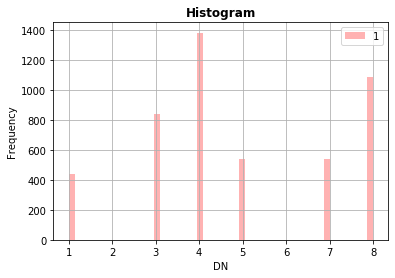

In [4]:
show_hist(data, bins=50, lw=1.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [5]:
filepath = '../toydata/Global_fire_atlas_dobcrop.tif'
data = rio.open(filepath)

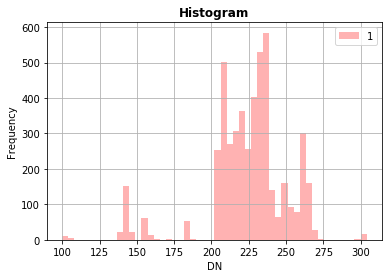

In [6]:
show_hist(data, bins=50, lw=1.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [91]:
filepath = '../toydata/Global_fire_atlas_speedcrop.tif'
data = rio.open(filepath)

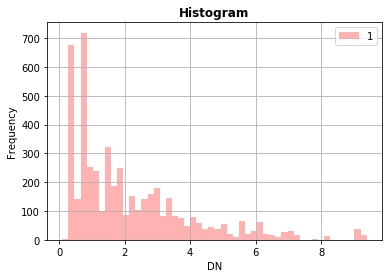

In [92]:
show_hist(data, bins=50, lw=1.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [9]:
filepath = '../toydata/Global_fire_atlas_firelinecrop.tif'
data = rio.open(filepath)

In [10]:
data.shape

(470, 456)

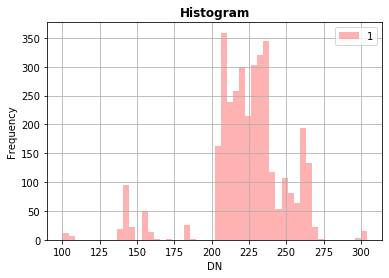

In [11]:
show_hist(data, bins=50, lw=1.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

In [96]:
fire_id = Image.open('../toydata/fireid.tif')
fire_id = np.array(fire_id)
fire_id[fire_id == -9999] = 0

fireline = Image.open('../toydata/Global_fire_atlas_firelinecrop.tif')
fireline = np.array(fireline)
fireline[fireline == -9999] = 0

firedir = Image.open('../toydata/Global_fire_atlas_dircrop.tif')
firedir = np.array(firedir)
firedir[firedir == -9999] = 0

firedob = Image.open('../toydata/Global_fire_atlas_dobcrop.tif')
firedob = np.array(firedob)
firedob[firedob == -9999] = 0

firespeed = Image.open('../toydata/Global_fire_atlas_speedcrop.tif')
firespeed = np.array(firespeed)
firespeed[firespeed == -9999] = 0 

UnidentifiedImageError: cannot identify image file '../toydata/Global_fire_atlas_speedcrop.tif'

In [6]:
fire_id.shape

(470, 456)

In [7]:
id = fire_id.reshape(214320,)

In [8]:
fire_id[fire_id>0]

array([140, 140, 140, ..., 189, 189, 189], dtype=int32)

In [26]:
# fire_id[0]

In [15]:
fireline

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [11]:
line = fireline.reshape(214320,)

In [18]:
fireline[fireline>0]

array([208, 208, 208, ..., 232, 231, 231], dtype=int32)

In [17]:
firedir

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [12]:
dir = firedir.reshape(214320,)

In [18]:
firedir[firedir>0]

array([1, 1, 3, ..., 7, 5, 5], dtype=int32)

In [19]:
firedob

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [20]:
firedob[firedob>0]

array([208, 208, 208, ..., 232, 231, 231], dtype=int32)

In [94]:
firespeed

array(<open DatasetReader name='../toydata/Global_fire_atlas_speedcrop.tif' mode='r'>,
      dtype=object)

In [95]:
firespeed[firespeed>0]

TypeError: '>' not supported between instances of 'DatasetReader' and 'int'

In [7]:
firedob.shape

(470, 456)

In [28]:
# fire_id[1]

In [23]:
type(firedob)

numpy.ndarray

In [13]:
fire = []

# for i in fire_id:
#     indices = np.where(fire_id == id, 1, 0)
#     fire.append(indices)
    
for x in np.nditer(fire_id):
    if x == 0:
        fire.append(0)
    else:
        fire.append(1)

In [25]:
type(fire)

list

In [15]:
fires = np.array(fire)

In [16]:
fires[fires>0]

array([1, 1, 1, ..., 1, 1, 1])

In [17]:
fires

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
len(fires)

214320

Need to combine matrix array into a 2D panda dataframe

In [147]:
df = pd.DataFrame(list(zip(fires, id, dir, line)), columns= ["y", "id", "dir", "perimeter"])

In [148]:
df

,y,id,dir,perimeter
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
214315,0,0,0,0
214316,0,0,0,0
214317,0,0,0,0
214318,0,0,0,0


In [149]:
df["dob"] = ""

In [150]:
df["pdir"] = ""

In [151]:
df["pspeed"] = ""

In [152]:
df

,y,id,dir,perimeter,dob,pdir,pspeed
0,0,0,0,0,,,
1,0,0,0,0,,,
2,0,0,0,0,,,
3,0,0,0,0,,,
4,0,0,0,0,,,
...,...,...,...,...,...,...,...
214315,0,0,0,0,,,
214316,0,0,0,0,,,
214317,0,0,0,0,,,
214318,0,0,0,0,,,


In [153]:
df["dob"] = df.groupby("id")["perimeter"].rank(ascending=1,method='dense')

In [154]:
df

,y,id,dir,perimeter,dob,pdir,pspeed
0,0,0,0,0,1.0,,
1,0,0,0,0,1.0,,
2,0,0,0,0,1.0,,
3,0,0,0,0,1.0,,
4,0,0,0,0,1.0,,
...,...,...,...,...,...,...,...
214315,0,0,0,0,1.0,,
214316,0,0,0,0,1.0,,
214317,0,0,0,0,1.0,,
214318,0,0,0,0,1.0,,


In [155]:
df1 = df.copy()
df1 = df1[df1.y > 0]

In [156]:
df1

,y,id,dir,perimeter,dob,pdir,pspeed
37869,1,140,1,208,7.0,,
37870,1,140,1,208,7.0,,
37871,1,140,3,208,7.0,,
38324,1,140,1,207,6.0,,
38325,1,140,3,207,6.0,,
...,...,...,...,...,...,...,...
139746,1,189,4,232,7.0,,
139747,1,189,4,232,7.0,,
139748,1,189,7,232,7.0,,
139749,1,189,5,231,6.0,,


In [164]:
df_unique = df1.drop_duplicates()

In [165]:
df_unique

,y,id,dir,perimeter,dob,pdir,pspeed
37869,1,140,1,208,7.0,,
37871,1,140,3,208,7.0,,
38324,1,140,1,207,6.0,,
38325,1,140,3,207,6.0,,
38779,1,140,8,206,5.0,,
...,...,...,...,...,...,...,...
137449,1,189,5,234,9.0,,
137467,1,189,5,230,5.0,,
137480,1,189,4,233,8.0,,
138831,1,189,4,232,7.0,,


In [116]:
# df["pdob"] = df["dob"]+1

In [ ]:
def prevdata (ids, dob, df):
    
    yid = ids
    ydob = dob - 1
    
    for ind in df.index:
        
        
        

In [ ]:
for ind in df.index:
    df["pdir"] = df.query('dir==')['A']
    


In [144]:
a = df[(df.id == df.id) & (df.dob == df.dob-1)][df.dir].values

KeyError: "None of [Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,\n            ...\n            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],\n           dtype='int64', length=214320)] are in the [columns]"

In [140]:
df

,y,id,dir,perimeter,dob,pdir,pspeed
0,0,0,0,0,1.0,1,
1,0,0,0,0,1.0,1,
2,0,0,0,0,1.0,1,
3,0,0,0,0,1.0,1,
4,0,0,0,0,1.0,1,
...,...,...,...,...,...,...,...
214315,0,0,0,0,1.0,1,
214316,0,0,0,0,1.0,1,
214317,0,0,0,0,1.0,1,
214318,0,0,0,0,1.0,1,


In [118]:
df['id']>0

0         False
1         False
2         False
3         False
4         False
          ...  
214315    False
214316    False
214317    False
214318    False
214319    False
Name: id, Length: 214320, dtype: bool

In [119]:
df.loc[(df.id == 140)]

,y,id,dir,perimeter,dob,pdob
37869,1,140,1,208,7.0,8.0
37870,1,140,1,208,7.0,8.0
37871,1,140,3,208,7.0,8.0
38324,1,140,1,207,6.0,7.0
38325,1,140,3,207,6.0,7.0
...,...,...,...,...,...,...
77623,1,140,7,259,57.0,58.0
77624,1,140,4,255,54.0,55.0
77625,1,140,4,255,54.0,55.0
78076,1,140,4,253,52.0,53.0


In [115]:
df2 = df.copy()

In [74]:
df2 = df2.drop(['y','id','pdob'], axis=1)

In [80]:
df2

,dir,dob
0,0,1.0
1,0,1.0
2,0,1.0
3,0,1.0
4,0,1.0
...,...,...
214315,0,1.0
214316,0,1.0
214317,0,1.0
214318,0,1.0


In [84]:
data_train, data_test, labels_train, labels_test = train_test_split(df2, df.y, test_size=0.20, random_state=42)

In [85]:
data_train

,dir,dob
204701,0,1.0
76203,0,1.0
76814,0,1.0
156505,0,1.0
142978,0,1.0
...,...,...
119879,0,1.0
103694,0,1.0
131932,0,1.0
146867,0,1.0


In [89]:
labels_train

204701    0
76203     0
76814     0
156505    0
142978    0
         ..
119879    0
103694    0
131932    0
146867    0
121958    0
Name: y, Length: 171456, dtype: int64

In [86]:
def NB():
    
     # training with the Multinomia NB
    
    clf_m = MultinomialNB(alpha = 1)
    clf_m.fit(data_train, labels_train)
    score_clf_m = clf_m.score(data_test, labels_test)
    print("Accuracy for Multinomial Naive Bayes: " + "{:.2f}".format((score_clf_m * 100)) + "%" + "\n")

In [87]:
NB()

Accuracy for Multinomial Naive Bayes: 99.98%



## old codes

In [ ]:

# import sys
# import csv

# import os
# import sqlite3
# import copy
# from dbfread import DBF
# import geopandas as gpd
# import fiona
# import pprint
# import folium
# import descartes

# from rasterio.warp import calculate_default_transform, reproject, Resampling
# from rasterio import features
# import rasterio.mask
# import earthpy as et
# import earthpy.spatial as es
# import earthpy.plot as ep
# import pickle
# from scipy import stats

# print(f"Python Version = {sys.version}")
# print(f"Pandas Version = {pd.__version__}")
# print(f"Geopandas Version = {gpd.__version__}")
# print(f"rasterio version = {rio._base.gdal_version()}")

In [ ]:
# fires = fires.tolist()

In [ ]:
# type(fires)

In [ ]:
# fires

In [ ]:
# fire_id = fire_id[0].tolist()

In [ ]:
# fire_id

In [ ]:
# firedir = firedir[0].tolist()

In [ ]:
# firedob = firedob[0].tolist()

In [ ]:
# fireline = fireline[0].tolist()

In [ ]:
# fireline

In [ ]:
# arr_list = [fires, fire_id, firedir, firedob, fireline]

In [ ]:
# type(arr_list)

In [5]:
fire_id.shape

(470, 456)

In [6]:
arr = fire_id[np.nonzero(fire_id)] 

In [7]:
arr.shape

(4855,)

In [8]:
arr1 = fireline[np.nonzero(fire_id)]

In [9]:
arr1.shape

(4855,)

In [10]:
arr1

array([208, 208, 208, ..., 232, 231, 231], dtype=int32)

In [11]:
arr2 = firedir[np.nonzero(fire_id)]

In [12]:
arr2.shape

(4855,)

In [13]:
arr3 = firedob[np.nonzero(fire_id)] 

In [14]:
arr3.shape

(4855,)

In [15]:
arr3

array([208, 208, 208, ..., 232, 231, 231], dtype=int32)

In [16]:
df1 = pd.DataFrame(list(zip(arr, arr2, arr3, arr1)), columns= ["id", "dir", "dob", "perimeter"])

In [17]:
df1

,id,dir,dob,perimeter
0,140,1,208,208
1,140,1,208,208
2,140,3,208,208
3,140,1,207,207
4,140,3,207,207
...,...,...,...,...
4850,189,4,232,232
4851,189,4,232,232
4852,189,7,232,232
4853,189,5,231,231


In [52]:
arr2 = np.delete(arr1, 1, 0)

In [53]:
arr2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [54]:
arr2.shape

(469, 456)

In [79]:
arrs = []

for x in fire_id:
    arrs.append(np.unique(x))

In [75]:
fire_ids = set()
for row in fire_id:
    for val in row:
        fire_ids.add(val)

In [76]:
fire_ids

{0,
 140,
 141,
 142,
 143,
 146,
 147,
 148,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 170,
 171,
 178,
 184,
 185,
 188,
 189,
 190}

In [77]:
len(fire_ids)

23

In [ ]:
data_train, data_test, labels_train, labels_test = train_test_split(dfa, toy_fire_data_dict, test_size=0.20, random_state=42)

In [ ]:
# features = fire_ID, size, perimeter, expansion, fire_line, speed_direction

toy_fire_data_dict = {}
toy_burn = np.mat('0 0 0 0 0; 0 1 1 1 0; 0 1 1 0 0; 0 0 1 1 0; 0 1 1 1 1; 0 0 0 1 1')
toy_features = np.mat('0 0 0 0 0; 0 2 2 2 0; 0 2 2 0 0; 0 0 3 3 0; 0 3 3 3 3; 0 0 0 4 4')

In [ ]:
data_train, data_test, labels_train, labels_test = train_test_split(toy_fireline, toy_fire_data_dict, test_size=0.20, random_state=42)

In [ ]:
print ("** The shape of our train_data is ", data_train.shape,"\n")
print ("** The shape of our test_data is ", data_test.shape,"\n")

In [ ]:
def NB():
    
#     # training data set with Bernoulli NB
    
#     clf_b = BernoulliNB(alpha = 1, binarize = 0.6)
#     clf_b.fit(data_train, labels_train)
#     score_clf_b = clf_b.score(data_test, labels_test)
#     print("Accuracy for Bernoulli Naive Bayes: " + "{:.2f}".format((score_clf_b * 100)) + "%" + "\n")
    

    # training with the Multinomia NB
    
    clf_m = MultinomialNB(alpha = 1)
    clf_m.fit(data_train, labels_train)
    score_clf_m = clf_m.score(data_test, labels_test)
    print("Accuracy for Multinomial Naive Bayes: " + "{:.2f}".format((score_clf_m * 100)) + "%" + "\n")

In [ ]:
NB()

In [ ]:
img = Image.open(filepath)
img.show()

In [ ]:
df = np.array(img)
df

In [ ]:
df.shape

In [ ]:
df.size

In [ ]:
df[df>0]

In [ ]:
# train_data_mNB = features (burn? (1 or 0), fire_ID, speed, direction	direction_s) from previous day
# train_label_mNB = burn today?

In [ ]:
clf_m = MultinomialNB(alpha = 1)
clf_m.fit(train_data_mNB, train_labels_mNB)
score_clf_m = clf_m.score(dev_data, dev_labels)
print("Accuracy for Multinomial Naive Bayes: " + "{:.2f}".format((score_clf_m * 100)) + "%" + "\n")

In [ ]:
# 2016 yearly data from pickle file
gdf_2016 = pd.read_pickle('../toydata/Global_fire_atlas_datacrop.pickle')

In [ ]:
# import sys
# sys.path.append('/usr/bin/')
# import gdal_merge as gm